### Try out a linear regression on the data with three features

Here we are going to use a linear regression the same way we did it in notebook 2 - but instead of using all features we just fit out linear regression model on `salary beginn`, `jobcatagory` and `education degree` as the most significant ones. 

In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sms
import scipy.stats as stats

In [36]:
%store -r df

<AxesSubplot:>

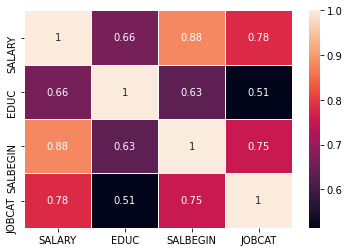

In [37]:
df = df[["SALARY", "EDUC", "SALBEGIN", "JOBCAT"]]
sns.heatmap(df.corr(),annot=True,lw=1)

In [38]:
df_X = pd.get_dummies(data=df.drop(columns = "SALARY"))
Y = df["SALARY"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_X, Y, test_size=0.4, random_state=17)
X_train

,EDUC,SALBEGIN,JOBCAT
470,15,15750,1
365,12,12000,1
350,12,13500,1
172,20,42480,3
65,19,30000,3
...,...,...,...
406,15,15750,1
390,12,12450,1
143,8,9750,1
241,12,18000,1


In [7]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [8]:
predictions = model.predict(X_test)

In [9]:
mean_squared_error(y_test, predictions)**0.5

7170.775667083625

In [10]:
plx.scatter(x = predictions, y = y_test - predictions)

In [11]:
plx.histogram(x = y_test-predictions)

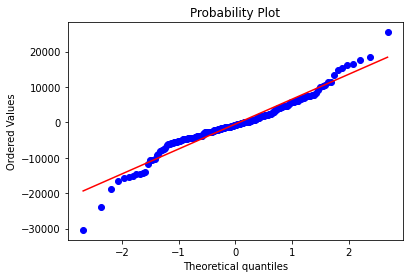

In [12]:
qq = stats.probplot(y_test-predictions, plot=plt)

In [13]:
X_train_sms = sms.add_constant(X_train)
ls=sms.OLS(y_train,X_train_sms).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     438.0
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.17e-105
Time:                        23:45:58   Log-Likelihood:                -2933.9
No. Observations:                 284   AIC:                             5876.
Df Residuals:                     280   BIC:                             5890.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8072.6654   2205.752     -3.660      0.0

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     33.08
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           2.51e-16
Time:                        22:19:33   Log-Likelihood:                -1434.3
No. Observations:                 148   AIC:                             2877.
Df Residuals:                     144   BIC:                             2889.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6249.0868   2307.784      2.708      0.0